# Identifying Parkinson's disease with XGboost #

## Section I

Parkinson's is a disease that can cause a nervous system disorder and affects the ability to moving human body. This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

I would like to build a model that can identify healthy people from these who have Parkinson's disease. The two possible techniques that I can build mu model are:

*1 - Using the Keras API within Tensorflow 2*

*2 - The second possible algorithm is the extreme gradient boosting techniques, commony known as XGboost technique, which utilizes decision Trees*

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).

Attribute Information:.

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

MDVP:Jitter(%) - measures of variation in fundamental frequency

MDVP:Shimmer

NHR, HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE

DFA - Signal fractal scaling exponent

RPDE,D2 - Two nonlinear dynamical complexity measures

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

## Goal of the project ##

Approximately one million people have Parkinson’s disease in the U.S. and there are around 50,000 new cases diagnosed each year where most patients are middel-aged. There is no cure for Parkinson’s disease but there are medications that can help patients with the symptoms. Patients can also undergo deep brain stimulation where electrical current is used to help block tremors and other movement symptoms of the disease. 

There is no known cause of Parkinson’s disease although a family history of the disease will increase your risk. Researchers think environmental factors such as smoking, pollution, heavy metals, medications and illegal drugs may be responsible for the onset of the disease.

### I belive that the data analysis and prediction for this project could be important ingredinat for understanding and treating Parkinson's desease. Above all, it could be used to identify the disease at the early stages. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Parkinsons_data.csv')

## Exploring the data ##

In [ ]:
df.info()

In [ ]:
df.describe().transpose()

In [ ]:
df.head()

In [3]:
sampleSize, featureSize = df.shape

print("Sampe size: ", sampleSize)
print("feature size: ", featureSize)

Sampe size:  195
feature size:  24


In [80]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
df[df.isnull()==True].shape

In [ ]:
len(df[df['status']==0])

In [ ]:
sns.distplot(df['DFA'], kde=True)

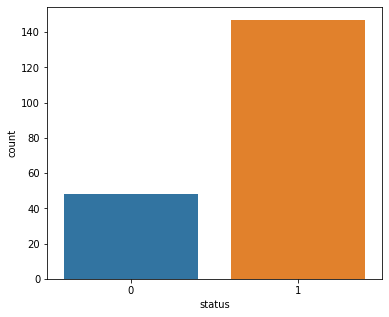

In [98]:
plt.figure(figsize=(6,5))
sns.countplot(df['status'])

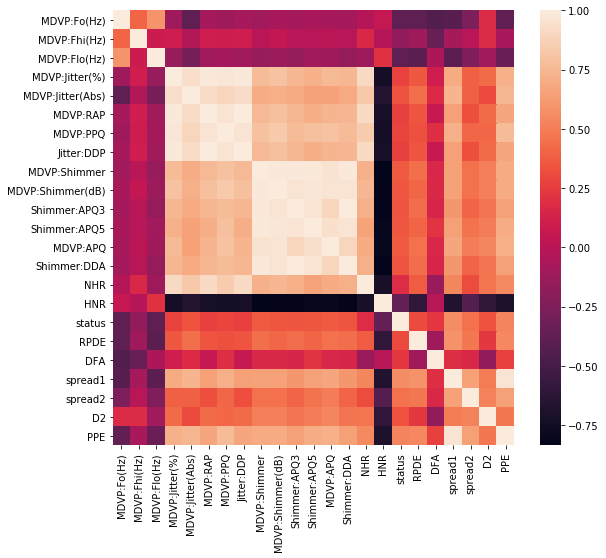

In [100]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr())

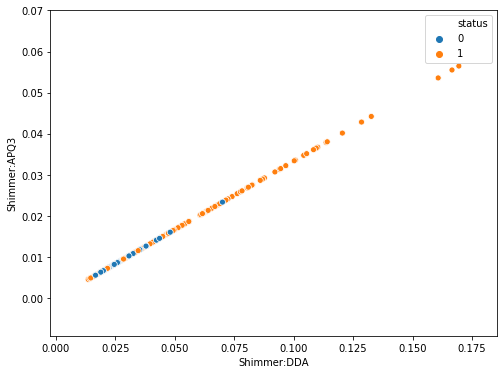

In [97]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Shimmer:DDA', y='Shimmer:APQ3', hue='status', data=df)

#### *The data set is dominatly of patients with Parkinson's disease, about 72%. Initial exploratory analysis shows that there are features that are highly correlated (e.g. Shimmer:APQ3 VS Shimmer:DDA). Such feature can possible be casue large number of parameters in neural networks.* ####

In [ ]:
df.corr()['status'].sort_values(ascending=False)

#### From the heatmap one can infer that HNR is highly uncorrelated with majority of the attributes, but  I need to explore the aggregate effect on the prediction wheather person has Parkinson's disease or not. ####

#### In the first part of the project I will build deep learning model that can predict the status of a given patient. For that I will build multilayer neurons that link the input, i.e. the atteributes in the data set, and the output which is the status, either zero or one. I start by performing train-test split of my data and then followed by normalization ####

#### On the second section of this project I will build another model using XGboost based on decision trees ####

In [4]:
df = df.drop(columns='name')

In [10]:
df.headd()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Train-test and XGboost model ##

In [5]:
import xgboost as xgb

In [169]:
#X = df.drop('status',axis=1).values
#y = df['status'].values

In [161]:
from sklearn.metrics import accuracy_score

In [146]:
df_data = pd.read_csv('Parkinsons_data.csv')

In [102]:
df_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [144]:
df_data = df_data.drop(columns='name')

In [147]:
mid = pd.DataFrame(df_data['status'])
df_data.drop(labels=['status'], axis=1, inplace = True)
df_data.insert(23, 'status', mid)
#mid

In [152]:
df_data= df_data.drop(columns='name')

In [153]:
X, y = df_data.iloc[:,:-1],df_data.iloc[:,-1]

In [155]:
y.shape

(195,)

In [156]:
df_data_dmatrix = xgb.DMatrix(data=X,label=y)

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [191]:
xg_reg_park = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.4, learning_rate = 0.05,
                max_depth = 3, alpha = 10, n_estimators = 20)

In [192]:
xg_reg_park.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [193]:
predics_park = xg_reg_park.predict(X_test)

In [194]:
accuracy_score(y_test,predics_park)

0.9743589743589743

In [170]:
from sklearn.metrics import classification_report,confusion_matrix

In [172]:
print(classification_report(y_test, predics_park))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.98        28

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



In [171]:
print(confusion_matrix(y_test, predics_park))

[[10  1]
 [ 0 28]]


In [173]:
y_test.shape

(39,)

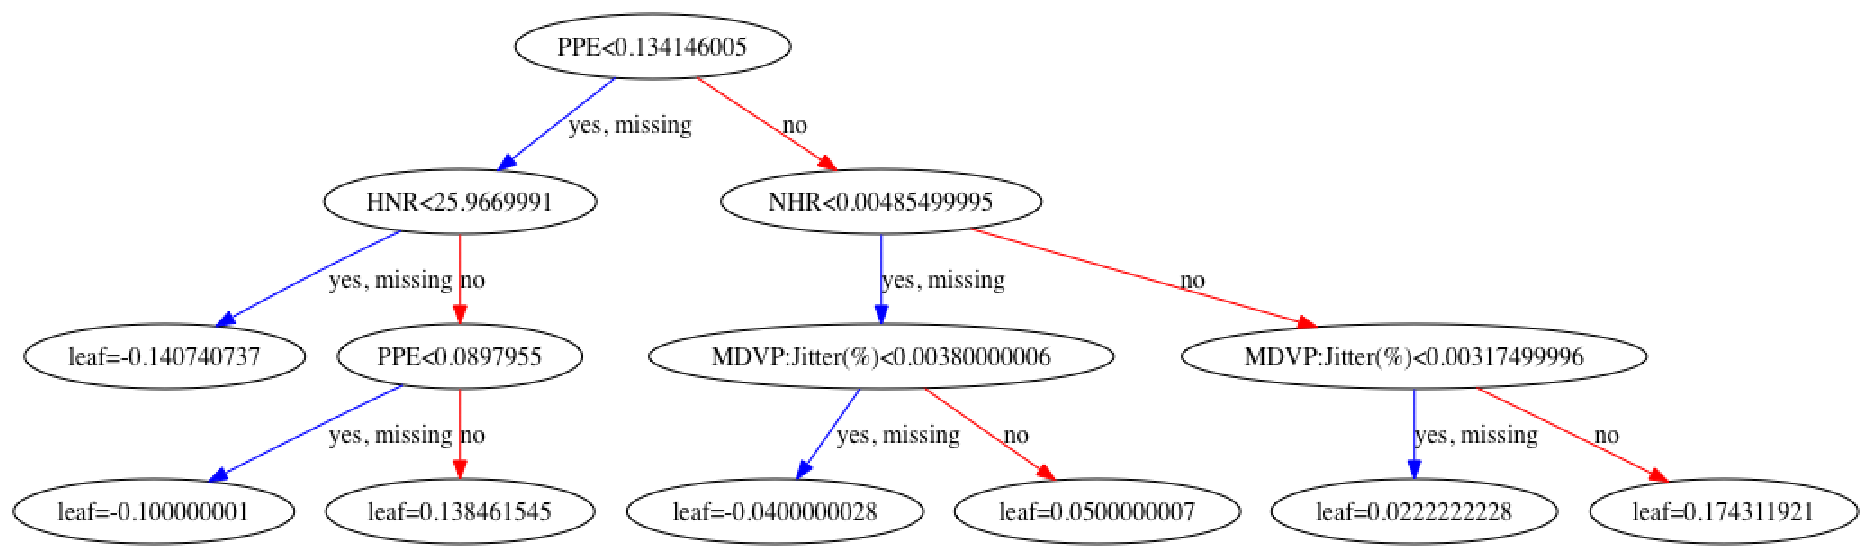

In [181]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(40,70))
xgb.plot_tree(xg_reg_park,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

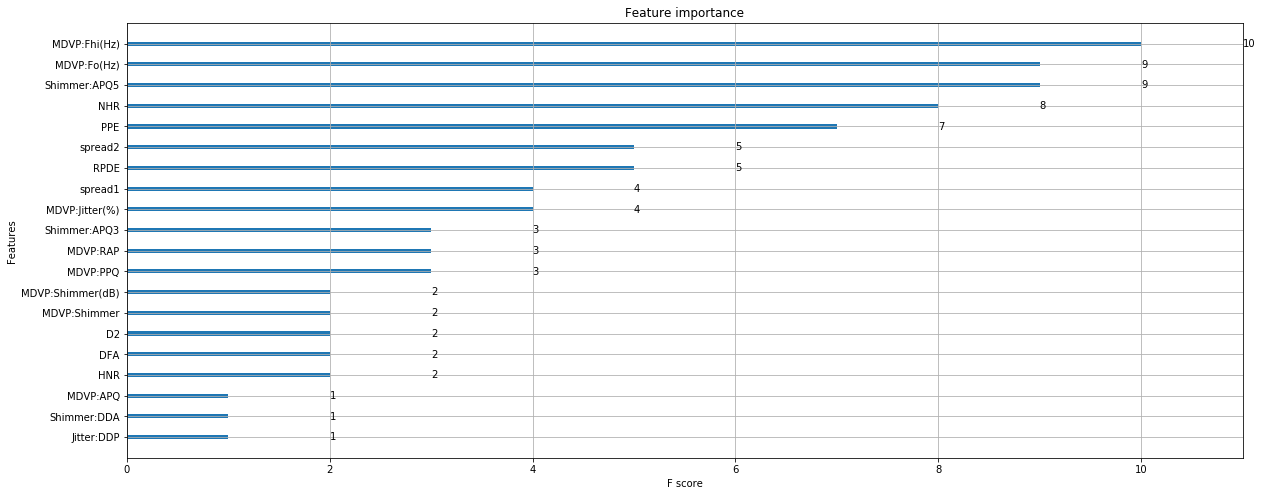

In [166]:
xgb.plot_importance(xg_reg_park)
plt.rcParams['figure.figsize'] = [20, 12]
plt.show()